# Results from DFT Calculations
This jupyter notebook extracts the results from the DFT calculations given from VASP.

## Bulk Structure
The figure below illustrates a unit cell of a structure on the form AB$_2$ with a space group: Pnma 62, which illustrates an orthorombic structure containing 8 A(Ba $\&$ Sr)-atoms  (large green spheres) and 16 B (Si, Ge, C)-atoms (small blue spheres) that are contained in the unit cell.

<img src="../Figures/cell.png">

## Convergence
In this section we are going to check convergence of various calculated properties and we will focus on the material BaSi$_2$ for the convergence tests, and base our calculation on these values throughout this project. 


### Convergence test of the total energy per unit cell with respect to energy cutoff.
We start by looking at the convergence of the total energy as a function of the energy cutoff.This can be visualized by plotting the total energy as a function of the cutoff energy and this isillustrated in Figure 1 below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sns.set()
sys.path.append('../../')
from Code.python_scripts.functions.data import readFilesFromDirectory, readEnergyFromFile


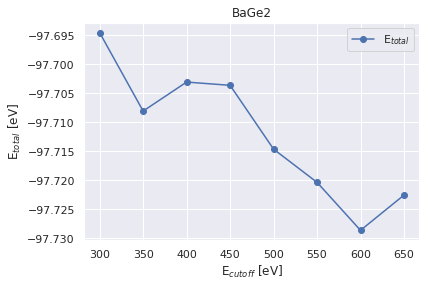

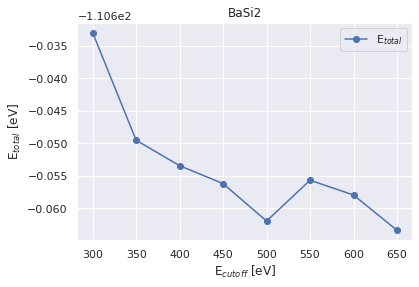

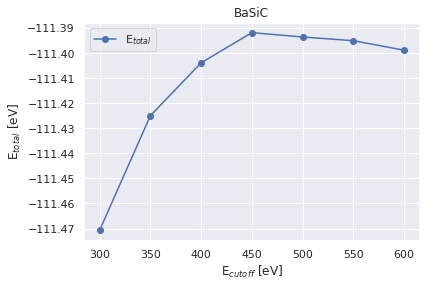

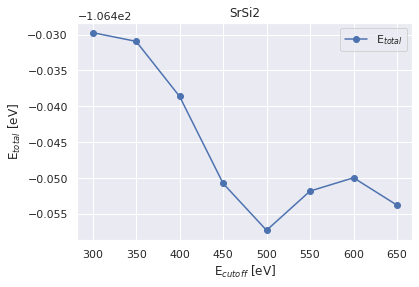

In [2]:
folders = ['BaGe2', 'BaSi2', 'BaSiC', 'SrSi2']
cutoff = np.arange(300, 700, 50)

for folder in folders:
    thisdir = '../Bulk/' + folder + '/convergence_Results'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    data = readEnergyFromFile(filepaths, filenames)

    total_energy = data['ecut1.txt']

    plt.plot(cutoff, total_energy, '-o')
    plt.legend(["E$_{total}$"])
    plt.title(folder)
    plt.xlabel("E$_{cutoff}$ [eV]")
    plt.ylabel("E$_{total}$ [eV]")
    plt.show()

### Energy Difference


,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-97.694552,NaN
350,-97.708062,13.5101
400,-97.703066,4.99546
450,-97.703627,0.56032
500,-97.714620,10.993
550,-97.720339,5.71906
600,-97.728604,8.2657
650,-97.722533,6.07102


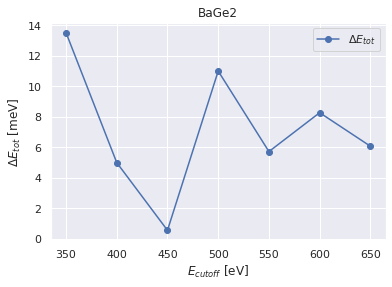

,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-110.632969,NaN
350,-110.649505,16.536
400,-110.653415,3.90985
450,-110.656176,2.7604
500,-110.661930,5.75466
550,-110.655656,6.27426
600,-110.657926,2.26977
650,-110.663354,5.42838


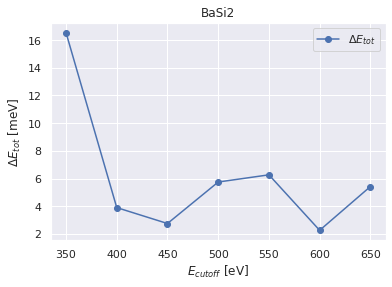

,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-111.470720,NaN
350,-111.424982,45.7378
400,-111.403897,21.0854
450,-111.391849,12.048
500,-111.393586,1.73754
550,-111.395059,1.47224
600,-111.398844,3.78534
650,NaN,NaN


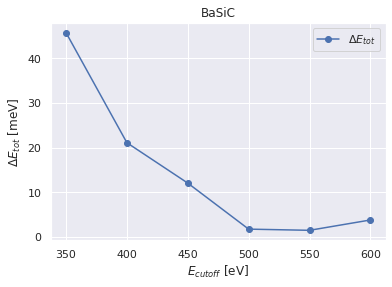

,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-106.429731,NaN
350,-106.430946,1.21441
400,-106.438620,7.67401
450,-106.450734,12.1146
500,-106.457271,6.53672
550,-106.451803,5.46818
600,-106.449951,1.85189
650,-106.453765,3.8137


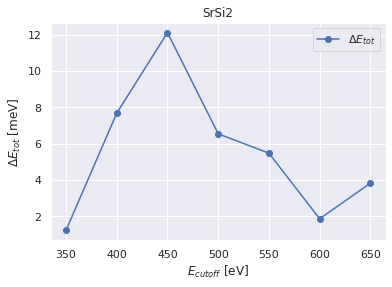

In [3]:
for folder in folders:
    
    thisdir = '../Bulk/' + folder + '/convergence_Results'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    data = readEnergyFromFile(filepaths, filenames)
    
    
    energy = pd.DataFrame({"E$_{cut}$": cutoff, "$E_{tot}$ [eV]": data['ecut1.txt']})
    diff = []
    diff.append('NaN')
    for i in range(1, len(data['ecut1.txt'])):
        diff.append(abs(data['ecut1.txt'][i] - data['ecut1.txt'][i-1])*1000)
    
    energy['$\Delta E_{tot}$ [meV]'] = diff 
    energy.set_index('E$_{cut}$', inplace=True, drop=True)
    display(energy)
    
    plt.plot(cutoff[1:], energy['$\Delta E_{tot}$ [meV]'][1:], "-o")
    plt.legend(["$\Delta E_{tot}$"])
    plt.title(folder)
    plt.xlabel("$E_{cutoff}$ [eV]")
    plt.ylabel("$\Delta E_{tot}$ [meV]")
    plt.show()

### Convergence test of the total energy per unit cell with respect to k-point density.

,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-97.659176,NaN
3,(3x3x2),-97.822786,163.61
4,(3x4x3),-97.801766,21.0204
5,(4x5x3),-97.801003,0.76249
6,(5x6x4),-97.801119,0.11574
7,(5x7x4),-97.801131,0.01215
8,(6x8x5),-97.801132,0.00046
9,(7x9x5),-97.801128,0.00373


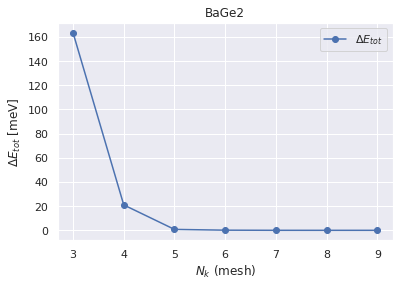

,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-110.702367,NaN
3,(3x3x2),-110.810483,108.117
4,(3x4x3),-110.807886,2.597
5,(4x5x3),-110.808417,0.5302
6,(5x6x4),-110.808362,0.05513
7,(5x7x4),-110.808366,0.00469
8,(6x8x5),-110.808363,0.00355
9,(7x9x5),NaN,NaN


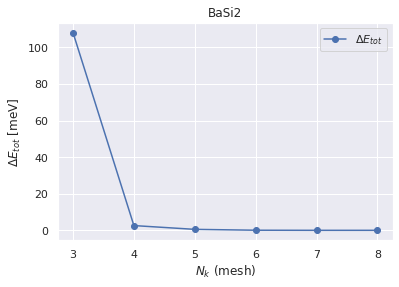

,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-111.618335,NaN
3,(3x3x2),-111.843047,224.712
4,(3x4x3),-111.821190,21.8571
5,(4x5x3),-111.824068,2.87783
6,(5x6x4),-111.823723,0.34462
7,(5x7x4),-111.823765,0.04142
8,(6x8x5),-111.823779,0.01417
9,(7x9x5),-111.823770,0.0094


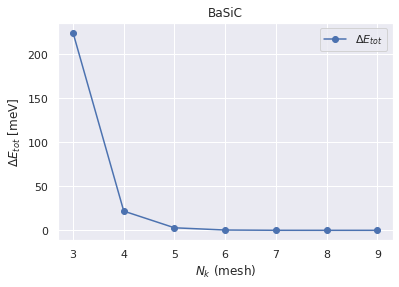

,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-106.659867,NaN
3,(3x3x2),-106.944075,284.208
4,(3x4x3),-106.910051,34.0238
5,(4x5x3),-106.916444,6.39294
6,(5x6x4),-106.915498,0.94637
7,(5x7x4),-106.915705,0.20702
8,(6x8x5),-106.915683,0.02226
9,(7x9x5),-106.915690,0.00735


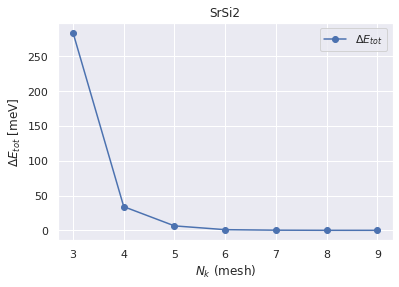

In [4]:
kpoints = np.arange(2,10)
mesh = ['(2x2x2)', '(3x3x2)', '(3x4x3)', '(4x5x3)', 
      '(5x6x4)', '(5x7x4)', '(6x8x5)', '(7x9x5)']

for folder in folders:
    
    thisdir = '../Bulk/' + folder + '/convergence_Results'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    data = readEnergyFromFile(filepaths, filenames)
    
    
    energy = pd.DataFrame({"Nk": kpoints, "mesh": mesh, "$E_{tot}$ [eV]": data['ktest.txt']})
    energy.set_index('Nk', inplace=True, drop=True)
    
    diff = []
    diff.append('NaN')
    for i in range(1, len(data['ktest.txt'])):
        diff.append(abs(data['ktest.txt'][i] - data['ktest.txt'][i-1])*1000)
    
    energy['$\Delta E_{tot}$ [meV]'] = diff
    display(energy)
    
    plt.plot(kpoints[1:], energy['$\Delta E_{tot}$ [meV]'][1:], "-o")
    plt.legend(["$\Delta E_{tot}$"])
    plt.title(folder)
    plt.xlabel("$N_k$ (mesh)")
    plt.ylabel("$\Delta E_{tot}$ [meV]")
    plt.show()
    

## Energy

#### Extracting Energy calculation for single atoms

Assigning the energy values for the single atom and crystal calculation

In [5]:
thisdir = '../atom_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)

barium = data['barium.txt']
silicon = data['silicon.txt']
carbon = data['carbon.txt']

basi2_atoms = 4*barium[0] + 8*silicon[0]
basi2_crystal = 2*barium[1] + silicon[2]
basi2_cluster = 8*barium[0] + 4*silicon[1]

### Enthalpy of Formation
We also calculate the enthalpy of formation ($\Delta H_f$) of these compounds with respect to their elemental standard to model the thermodynamic function; this is important information for synthesis of the material. Enthalpy of formation ($\Delta H_f$) is calculated by using following equation:

$\Delta H_f$(BaSi$_2$) = E$_{tot}$(BaSi$_2$) - $\mu_{Ba}$ - 2$\mu_{Si}$

Here, $\Delta H_f$(BaSi$_2$) is the enthalpy of formation of compound BaSi$_2$. E$_{tot}$ (BaSi$_2$) is the total energy of the compound BaSi$_2$. $\mu_{Ba}$ and $\mu_{Si}$ represent the chemical potential of respective element (Ba and Si), i.e., a ground state total energy of each elemental solid per atom.


In [6]:
thisdir = '../Layers/energies/etot.txt'
folders = ['Bulk']
data = pd.read_table(thisdir, delim_whitespace=True)


energies = pd.DataFrame({"$E_{tot}$ [eV]": data['energy']})
for i in range(1, len(energies)):
    energies = energies.drop([i])
hf = []
ecoh = []

hf.append((data['energy'][0] - 2*basi2_crystal)/24)
ecoh.append((data['energy'][0] - 2*basi2_atoms)/24)
energies['$E_{tot}$ [eV]'][0] = energies['$E_{tot}$ [eV]'][0]/24





energies['$\Delta H_f$ [eV]'] = hf
energies['$E_{coh}$ [eV]'] = ecoh
energies['Structure'] = folders
energies.set_index('Structure')

#print(energies.to_latex(index=False))

,$E_{tot}$ [eV],$\Delta H_f$ [eV],$E_{coh}$ [eV]
Structure,,,
Bulk,-4.060472,-0.388524,-4.680065


### Interlayer Energy calculations
Extracting the data from the text files and visualize the data in plots

#### Graphite

Text(0, 0.5, 'Energy/atom [ev]')

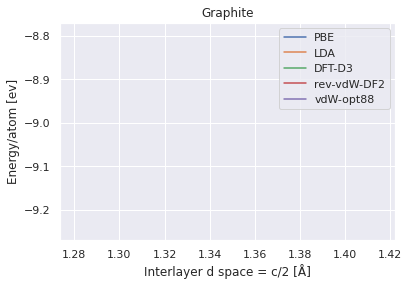

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/Graphite/DFT-D3.txt'
rev = '../Layers/L_L_distance/Graphite/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/Graphite/PBE.txt'
lda = '../Layers/L_L_distance/Graphite/LDA.txt'
vdw = '../Layers/L_L_distance/Graphite/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)

# The starting distance between layers
origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
x += origo
n = 4 # Number of atoms
plt.plot(x, (pbe['energy']-4*carbon)/n)
plt.plot(x, (lda['energy']-4*carbon)/n)
plt.plot(x, (dft['energy']-4*carbon)/n)
plt.plot(x, (rev['energy']-4*carbon)/n)
plt.plot(x, (vdw['energy']-4*carbon)/n)
plt.legend(['PBE', 'LDA', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('Graphite')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')

#### BaSi2

Text(0, 0.5, 'Energy/atom [ev]')

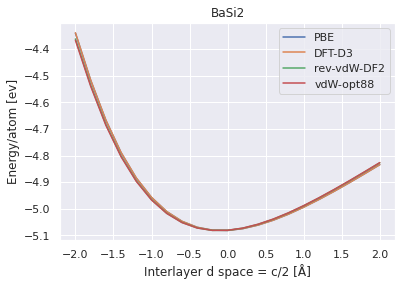

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/BaSi2/Bulk/DFT-D3.txt'
rev = '../Layers/L_L_distance/BaSi2/Bulk/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/BaSi2/Bulk/PBE.txt'
lda = '../Layers/L_L_distance/BaSi2/Bulk/LDA.txt'
vdw = '../Layers/L_L_distance/BaSi2/Bulk/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)


# The starting distance between layers
#origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
#x += origo
n = 24 # Number of atoms
plt.plot(x, (pbe['energy']-basi2_atoms)/n)
plt.plot(x, (dft['energy']-basi2_atoms)/n)
plt.plot(x, (rev['energy']-basi2_atoms)/n)
plt.plot(x, (vdw['energy']-basi2_atoms)/n)
plt.legend(['PBE', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')


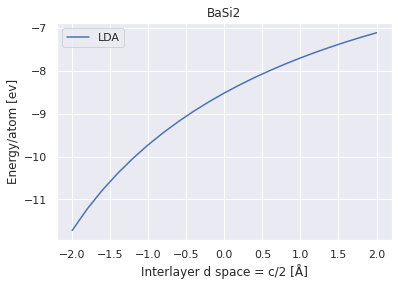

In [9]:
plt.plot(x, (lda['energy']-basi2_atoms)/n)
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')
plt.legend(['LDA'])

# Density of States

## Total DOS

/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/dos/Bulk
  warnings.warn(


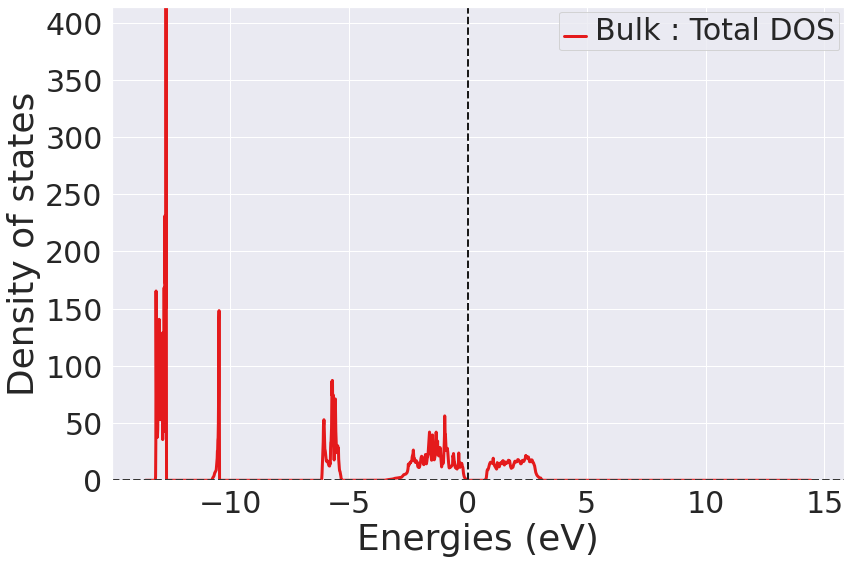

In [10]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter, BSDOSPlotter

folders = ['Bulk']

for folder in folders:
    
    
    thisdir = '../Layers/dos/' + folder + '/'


    v = Vasprun(thisdir+'vasprun.xml')
    tdos = v.tdos
    plotter = DosPlotter()
    plotter.add_dos(folder + " : Total DOS", tdos)
    plotter.show()

## Elemental DOS

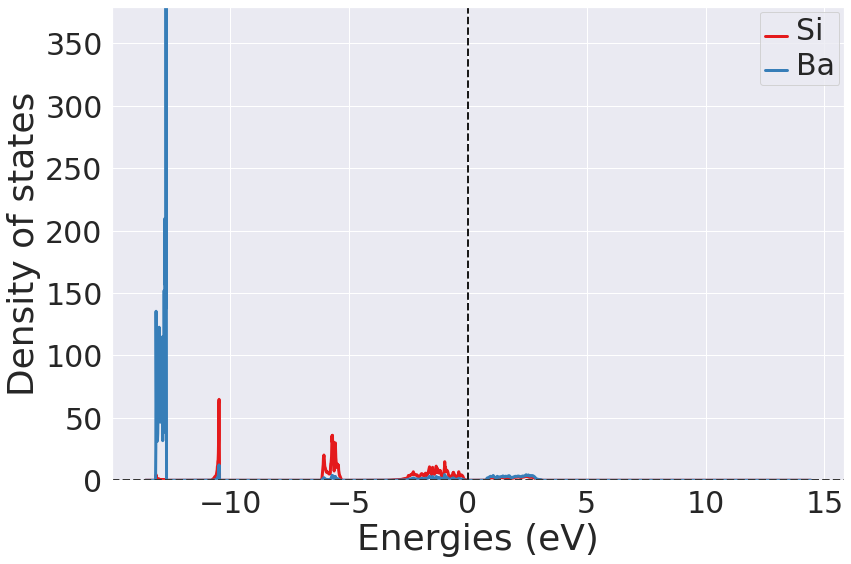

In [11]:
folders = ['Bulk']
for folder in folders:
    
    
    thisdir = '../Layers/dos/' + folder + '/'


    v = Vasprun(thisdir+'vasprun.xml')
    cdos = v.complete_dos
    element_dos = cdos.get_element_dos()
    plotter = DosPlotter()
    plotter.add_dos_dict(element_dos)
    plotter.show()

### Si spd DOS 

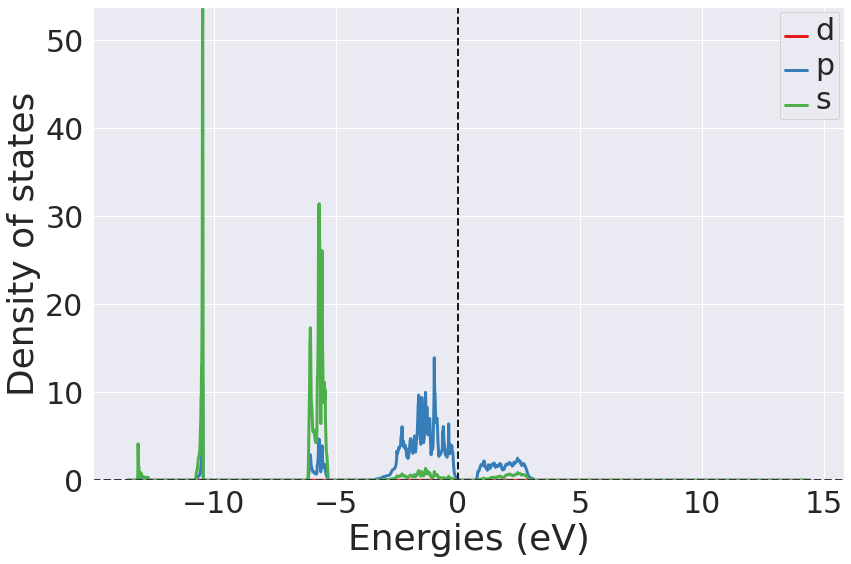

In [12]:
folders = ['Bulk']
for folder in folders:
    
    
    thisdir = '../Layers/dos/' + folder + '/'
    cdos = v.complete_dos
    element_spd_dos = cdos.get_element_spd_dos('Si')
    plotter = DosPlotter()
    plotter.add_dos_dict(element_spd_dos)
    plotter.show()

### Ba spd DOS

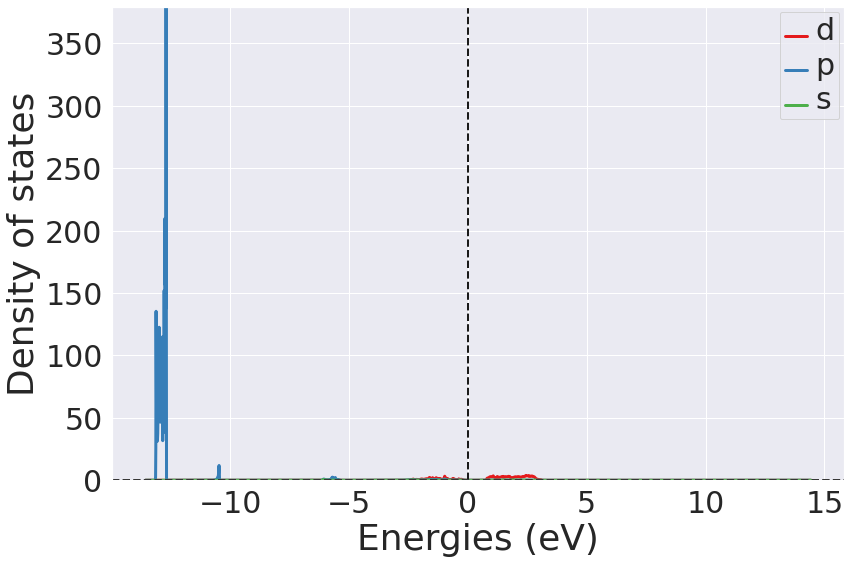

In [13]:
folders = ['Bulk']
for folder in folders:
    
    
    thisdir = '../Layers/dos/' + folder + '/'
    cdos = v.complete_dos
    element_spd_dos = cdos.get_element_spd_dos('Ba')
    plotter = DosPlotter()
    plotter.add_dos_dict(element_spd_dos)
    plotter.show()

# Band Structure

## PBE + vdW

/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/band_structure/rev-vdW-DF2/Bulk
  warnings.warn(


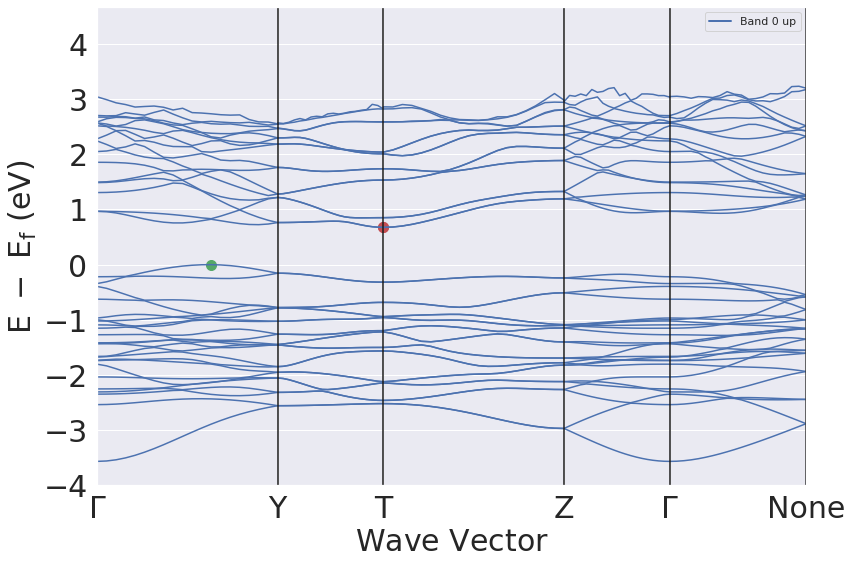

In [14]:
folders = ['Bulk']
for folder in folders:

    thisdir = '../Layers/band_structure/rev-vdW-DF2/' + folder + '/'

    v = Vasprun(thisdir + 'vasprun.xml')
    gap = v.eigenvalue_band_properties

    v = BSVasprun(thisdir + 'vasprun.xml')
    bs = v.get_band_structure(kpoints_filename=thisdir+'KPOINTS', line_mode=True)
    plt = BSPlotter(bs)
    plt.get_plot(vbm_cbm_marker=True)

## HSE

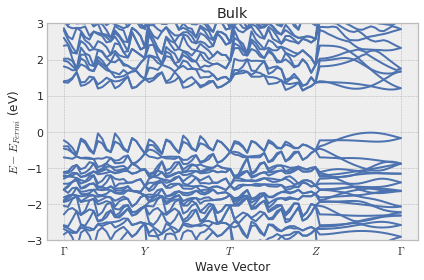

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from vasprun import vasprun
folders = ['Bulk']

for folder in folders:

    thisdir = '../Layers/band_structure/HSE/' + folder + '/'

    vasp = vasprun(thisdir+'vasprun.xml')
    
    
    fig = plt.figure()
    vasp.plotbands(bravais="orthorhombic", kpoints=['Gamma', 'Y', 'T', 'Z', 'Gamma'], title=folder)
    
    